In [1]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
#Loading iris dataset features and response 
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
#Splitting the data into test and training partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =4)

In [4]:
#Instantiating the estimator for KNNClassifier for n =5 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))


0.973684210526


In [5]:
#Now this model is having high variance as the accuracy will change on the basis of the variation in the train-test splits 
#So we will find the accuracy by splitting the test -train data 5 times differently and then take average of them which is
#known as k- Fold cross Validation.
#Importing KFold cross validation model
from sklearn.cross_validation import KFold

In [16]:
kf = KFold(25, n_folds=5 , shuffle=False)
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration,data in enumerate(kf,start=1):
    #print(iteration, data[0], data[1])
    print('{:^9} {} {}'.format(iteration, data[0], data[1]))


Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]


In [18]:
# How to measure accuracy using k-fold cross validation
from sklearn.cross_validation import cross_val_score

In [23]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    kn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


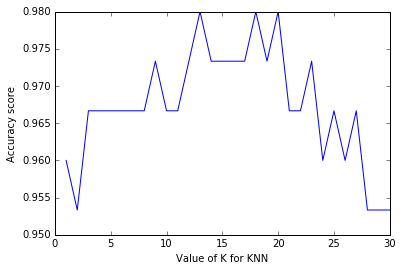

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy score')

In [26]:
#10-fold cross-validation using knn model with n=20 
knn=KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.98


In [27]:
#10-fold cross validation on Logistic regression using Iris dataset
from sklearn.linear_model import LogisticRegression

In [29]:
logreg=LogisticRegression()
scores_logreg=cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores_logreg.mean())

0.953333333333


In [30]:
#Cross Validation Feature selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [31]:
data = pd.read_csv('Advertising.csv')

In [32]:
feature_cols= ['TV', 'Radio', 'Newspaper']
X=data[feature_cols]
y = data.Sales

In [40]:
lm = LinearRegression()
scores_lm = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores_lm)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [42]:
scores_lm_corrected = -scores_lm
print(scores_lm_corrected)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [44]:
rmse_scores = np.sqrt(scores_lm_corrected)
print(rmse_scores)

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [45]:
#Average rmse mean
print(rmse_scores.mean())

1.69135317081


In [46]:
#10-fold cross validation after omitting the feature 'Newspaper' from the dataset to check the accuracy
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y=data.Sales

In [47]:
lm1 = LinearRegression()
scores2 = cross_val_score(lm1, X, y, cv=10, scoring='mean_squared_error')
print(scores2)

[-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ]


In [48]:
mse2 = -scores2
print(mse2)

[ 3.38264572  3.28736055  2.09185507  2.81784389  1.27311083  1.74391853
  8.0006111   2.07650936  3.03635301  2.4289835 ]


In [49]:
rmse2 = np.sqrt(mse2)

In [50]:
print(rmse2.mean())

1.67967484191
